# Spaceship Titanic Passenger Data

This dataset contains personal records of the passengers aboard the Spaceship Titanic. The main task is to predict whether a passenger was transported to another dimension based on their personal and transactional information.

## Dataset Files

### 1. `train.csv`
Contains personal records for about two-thirds (~8700) of the passengers, serving as the training data.

#### Columns:

- `PassengerId`: A unique Id for each passenger, formatted as `gggg_pp`. `gggg` indicates a group the passenger is traveling with, and `pp` is their number within the group. People in a group could be family members or others.
- `HomePlanet`: The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep`: Indicates if the passenger chose to be in suspended animation for the voyage. Passengers in cryosleep stay in their cabins.
- `Cabin`: The cabin number, formatted as `deck/num/side`. `side` can be either 'P' for Port or 'S' for Starboard.
- `Destination`: The planet the passenger will debark to.
- `Age`: The age of the passenger.
- `VIP`: Indicates if the passenger paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Amount billed by the passenger at each of Spaceship Titanic's luxury amenities.
- `Name`: First and last names of the passenger.
- `Transported`: Whether the passenger was transported to another dimension. This is the target variable.

### 2. `test.csv`
Contains personal records for the remaining one-third (~4300) of the passengers, serving as the test data. The task is to predict the `Transported` value for these passengers.

### 3. `sample_submission.csv`
A submission file in the correct format.

#### Columns:

- `PassengerId`: Id for each passenger in the test set.
- `Transported`: The target. Predict either `True` or `False` for each passenger.

# Step 1: Data cleaning

In [136]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

#
pd.set_option("display.max_rows", 999)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

import scipy.stats as stats

# layout the code line
import jupyter_black

jupyter_black.load()

# Ignore useless warnings (see SciPy issue #5998)
import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [137]:
os.getcwd()

'/Users/fulin/Documents/GitHub/Python_Project_Group_09/spaceship-titanic/data'

In [138]:
PATH = r"/Users/fulin/Documents/GitHub/Python_Project_Group_09/spaceship-titanic/data/"
os.chdir(PATH)

In [139]:
df_init = pd.read_csv("train.csv")
df = df_init.copy()

In [140]:
print(f"Shape of dataframe is {df.shape}")
display(df.info())

Shape of dataframe is (8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

In [141]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [142]:
df.drop(columns=["Name"], inplace=True)

In [143]:
display(df.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [144]:
# Filling missing values in continuous columns with their mean

continuous_columns = [
    "Age",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
]
df[continuous_columns] = df[continuous_columns].fillna(df[continuous_columns].mean())

# Filling missing values in categorical columns with their mode
categorical_columns_tofill = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
for column in categorical_columns_tofill:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [145]:
# Printing unique values in categorical columns
print(f"Unique Values in HomePlanet: {df['HomePlanet'].unique()} \n")
print(f"Unique Values in CryoSleep: {df['CryoSleep'].unique()} \n")
print(f"Unique Values in Cabin: {df['Cabin'].unique()} \n")
print(f"Unique Values in Destination: {df['Destination'].unique()} \n")
print(f"Unique Values in VIP: {df['VIP'].unique()} \n")

Unique Values in HomePlanet: ['Europa' 'Earth' 'Mars'] 

Unique Values in CryoSleep: [False  True] 

Unique Values in Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

Unique Values in Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e'] 

Unique Values in VIP: [False  True] 



In [146]:
# Extracting Deck Information
# df["Deck"] = df["Cabin"].apply(
#     lambda x: x.split("/")[0] if isinstance(x, str) and "/" in x else "Unknown"
# )
# df["Num"] = df["Cabin"].apply(
#     lambda x: x.split("/")[1] if isinstance(x, str) and "/" in x else "Unknown"
# )
# df["Side"] = df["Cabin"].apply(
#     lambda x: x.split("/")[2] if isinstance(x, str) and "/" in x else "Unknown"
# )

df["Deck"] = df["Cabin"].apply(
    lambda x: x.split("/")[0] if isinstance(x, str) and "/" in x else np.nan
)
df["Num"] = df["Cabin"].apply(
    lambda x: x.split("/")[1] if isinstance(x, str) and "/" in x else np.nan
)
df["Side"] = df["Cabin"].apply(
    lambda x: x.split("/")[2] if isinstance(x, str) and "/" in x else np.nan
)

In [147]:
df["Deck"].isna().sum()

0

In [148]:
df["familyId"] = df["PassengerId"].str.extract(r"(\d+)_")
df["familySize"] = df.groupby("familyId")["PassengerId"].transform("count")

In [149]:
df.drop(columns=["PassengerId", "Cabin", "familyId"], axis=1, inplace=True)

In [150]:
display(df.head(5))

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,familySize
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,2
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1


# Step 2: Data exploration !!

In [151]:
quant_col = df[
    ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "familySize"]
]

cat_col = df[["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Num", "Side"]]

Text(0.5, 1.0, 'Transported Feature Distribution')

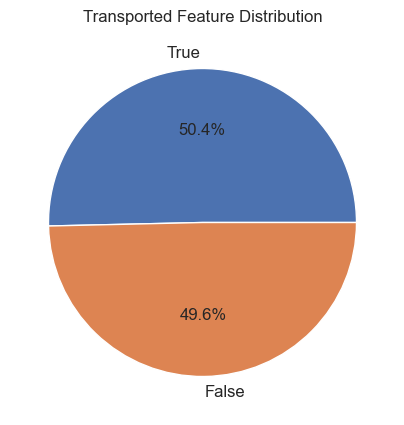

In [152]:
plt.figure(figsize=(5, 5))
plt.pie(
    df["Transported"].value_counts(),
    labels=df["Transported"].value_counts().keys(),
    autopct="%1.1f%%",
)
plt.title("Transported Feature Distribution")

<Axes: >

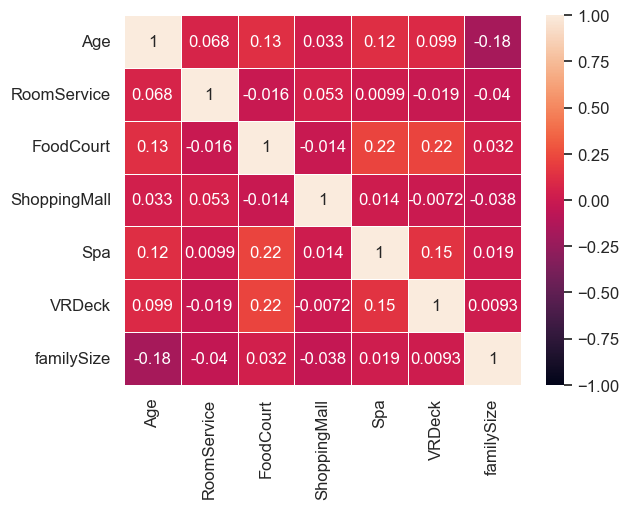

In [153]:
sns.heatmap(quant_col.corr(), annot=True, linewidths=0.5, vmin=-1, vmax=1)

In [154]:
def quant_cat_analysis(data, quant_var, cat_var):
    """
    A fonction to discover the link from between a quantitive variable and a categorical variable
    By using ANOVA analysis
    """

    anova_table = pd.DataFrame(
        columns=["Source", "DF", "Sum of Squares", "Mean Square", "F", "PR(>F)"]
    )

    groups = data.groupby(cat_var)
    for group_name, group_data in groups:
        group_values = [group_data[quant_var].values for _, group_data in groups]
        f_statistic, p_value = stats.f_oneway(*group_values)
        df_between = len(groups) - 1
        df_within = len(data) - len(groups)
        ss_between = (group_data[quant_var].mean() - data[quant_var].mean()) ** 2 * len(
            group_data
        )
        ss_within = ((group_data[quant_var] - group_data[quant_var].mean()) ** 2).sum()
        ms_between = ss_between / df_between
        ms_within = ss_within / df_within
        anova_table = anova_table.append(
            {
                "Source": group_name,
                "DF": df_between,
                "Sum of Squares": ss_between,
                "Mean Square": ms_between,
                "F": f_statistic,
                "PR(>F)": p_value,
            },
            ignore_index=True,
        )

    print("ANOVA table:")
    display(anova_table)

    p_values = anova_table["PR(>F)"]
    significant_diff = p_values < 0.05
    # print(f"Significance({quant_var} and {cat_var}): {significant_diff}")
    print(f"Significance({quant_var} and {cat_var}):\n")
    display(significant_diff)

    sns.set(style="whitegrid")
    plt.figure(figsize=(2, 5))
    sns.boxplot(x=cat_var, y=quant_var, data=data, palette="Set3")

    plt.title(f"Grouped Boxplots for {quant_var} by {cat_var}")

    plt.show()

In [155]:
def cat_cat_analysis(data, var1, var2):
    """
    The fonction to check the relationship between two categorical variables
    By using the chi-squre and providing the carmens'v
    """

    # Generate the contingency table
    contingency_table = pd.crosstab(data[var1], data[var2])

    # Check the significance of their relationship with the chi-square test
    chi2, p, dof, expected_freq = stats.chi2_contingency(contingency_table)

    # Calculate Cramer's V
    n = contingency_table.values.sum()
    k = contingency_table.shape[0]
    r = contingency_table.shape[1]
    V = np.sqrt(chi2 / (n * min(k - 1, r - 1)))
    print("Cramer's V:", V)

    observed_table = contingency_table
    expected_table = expected_freq
    expected_table = pd.DataFrame(
        expected_freq, index=contingency_table.index, columns=contingency_table.columns
    )  # Convert expected_freq to a DataFrame

    n = contingency_table.values.sum()

    residual_table = (observed_table - expected_table) / np.sqrt(expected_table)

    print("Observed Table:")
    display(observed_table)
    print("\nExpected Table:")
    display(expected_table)
    print("\nResidual Table:")
    display(residual_table)

    print(f"\nChi-Squared Statistic: {chi2}, p-value: {p}, Degree of freedom : {dof}")
    significant_diff = p < 0.05
    print(f"\nSignificance({var1} and {var2}): {significant_diff}")

    # Plot side-by-side bar charts
    contingency_table.plot(kind="bar", stacked=True)
    plt.title(f"Side-by-Side Bar Chart for {var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel("Frequency")
    plt.show()

    # Plot stacked bar charts
    contingency_table.T.plot(kind="bar", stacked=True)
    plt.title(f"Stacked Bar Chart for {var2} vs {var1}")
    plt.xlabel(var2)
    plt.ylabel("Frequency")
    plt.show()

ANOVA table:


/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_18987/973082815.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_table = anova_table.append(
/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_18987/973082815.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_table = anova_table.append(
/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_18987/973082815.py:23: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  anova_table = anova_table.append(


,Source,DF,Sum of Squares,Mean Square,F,PR(>F)
0,False,1,76.191188,76.191188,59.768286,1.186047e-14
1,True,1,75.094787,75.094787,59.768286,1.186047e-14


Significance(familySize and Transported):



0    True
1    True
Name: PR(>F), dtype: bool

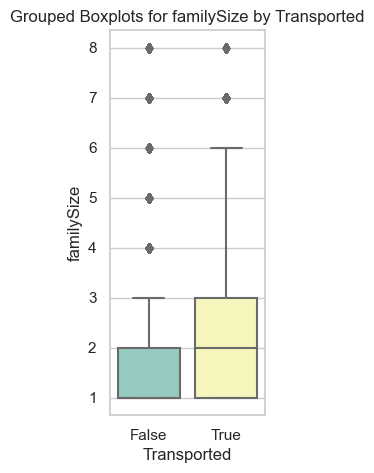

In [156]:
quant_cat_analysis(df, "familySize", "Transported")

Cramer's V: 0.1915428197129473
Observed Table:


Transported,False,True
HomePlanet,,
Earth,2749,2054
Europa,727,1404
Mars,839,920



Expected Table:


Transported,False,True
HomePlanet,,
Earth,2384.095824,2418.904176
Europa,1057.778097,1073.221903
Mars,873.126078,885.873922



Residual Table:


Transported,False,True
HomePlanet,,
Earth,7.473379,-7.419412
Europa,-10.170433,10.096991
Mars,-1.154909,1.146570



Chi-Squared Statistic: 318.93444995471856, p-value: 5.549631517016864e-70, Degree of freedom : 2

Significance(HomePlanet and Transported): True


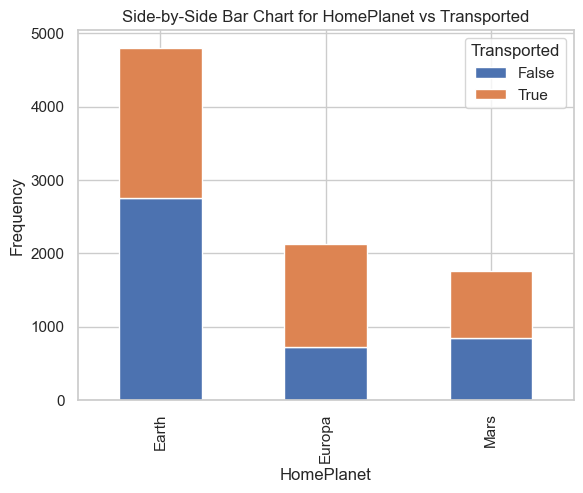

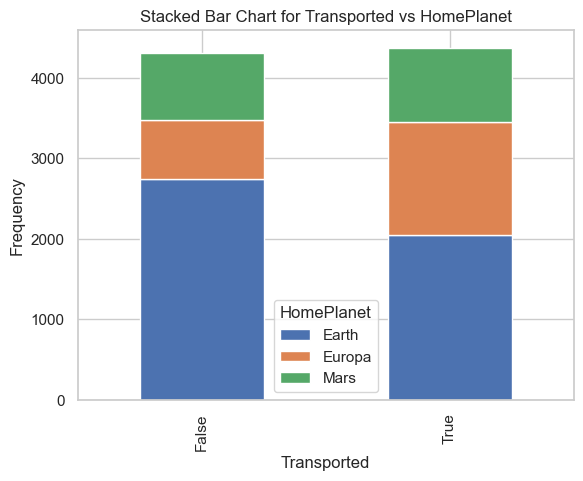

In [157]:
cat_cat_analysis(df, "HomePlanet", "Transported")

Cramer's V: 0.4598910706402278
Observed Table:


Transported,False,True
CryoSleep,,
False,3761,1895
True,554,2483



Expected Table:


Transported,False,True
CryoSleep,,
False,2807.504889,2848.495111
True,1507.495111,1529.504889



Residual Table:


Transported,False,True
CryoSleep,,
False,17.995263,-17.865317
True,-24.557860,24.380524



Chi-Squared Statistic: 1838.5677340571679, p-value: 0.0, Degree of freedom : 1

Significance(CryoSleep and Transported): True


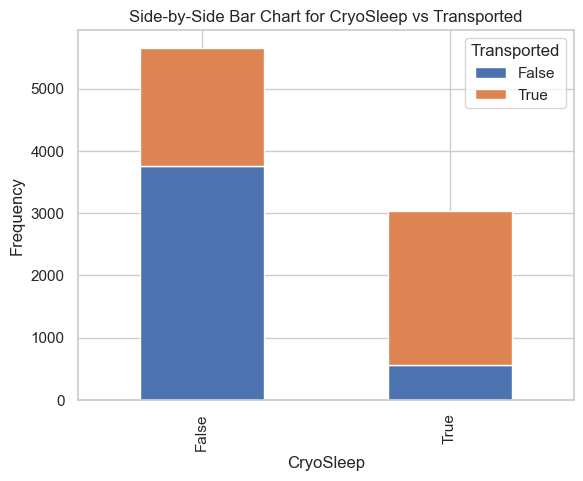

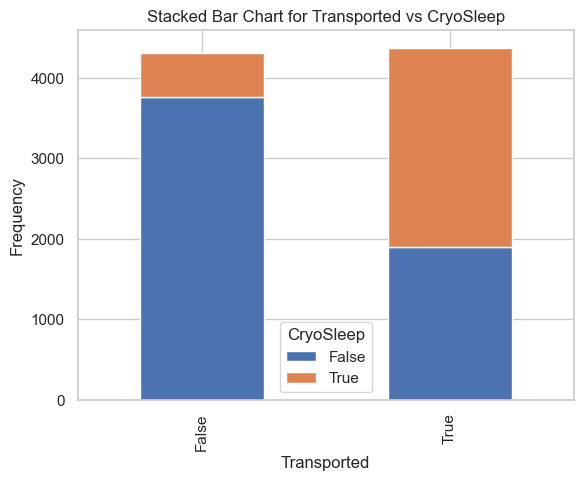

In [158]:
cat_cat_analysis(df, "CryoSleep", "Transported")

Cramer's V: 0.1101973039641513
Observed Table:


Transported,False,True
Destination,,
55 Cancri e,702,1098
PSO J318.5-22,395,401
TRAPPIST-1e,3218,2879



Expected Table:


Transported,False,True
Destination,,
55 Cancri e,893.477511,906.522489
PSO J318.5-22,395.115610,400.884390
TRAPPIST-1e,3026.406879,3070.593121



Residual Table:


Transported,False,True
Destination,,
55 Cancri e,-6.405838,6.359581
PSO J318.5-22,-0.005816,0.005774
TRAPPIST-1e,3.482702,-3.457552



Chi-Squared Statistic: 105.56297434781096, p-value: 1.1947894351445014e-23, Degree of freedom : 2

Significance(Destination and Transported): True


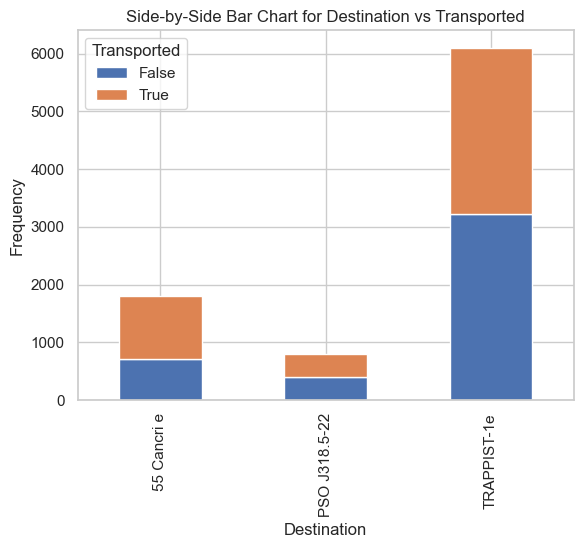

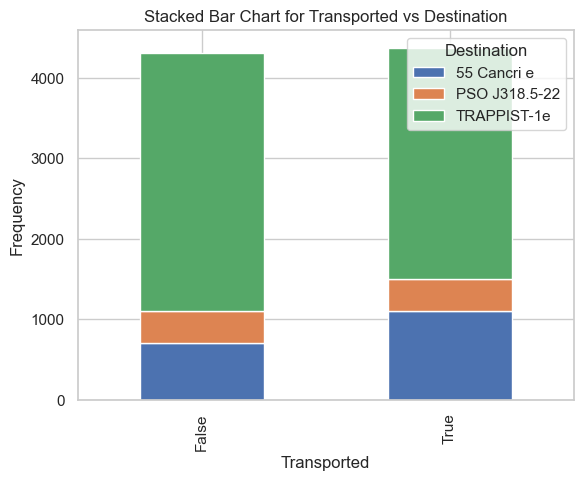

In [159]:
cat_cat_analysis(df, "Destination", "Transported")

Cramer's V: 0.036491650928588755
Observed Table:


Transported,False,True
VIP,,
False,4192,4302
True,123,76



Expected Table:


Transported,False,True
VIP,,
False,4216.221097,4277.778903
True,98.778903,100.221097



Residual Table:


Transported,False,True
VIP,,
False,-0.373020,0.370326
True,2.437035,-2.419437



Chi-Squared Statistic: 11.575951627085105, p-value: 0.0006681023600149099, Degree of freedom : 1

Significance(VIP and Transported): True


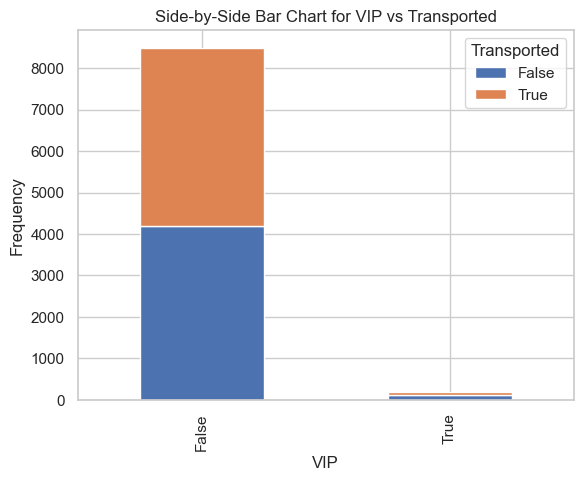

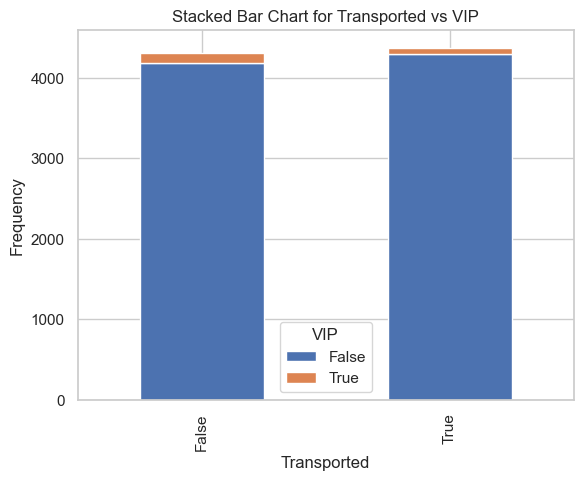

In [160]:
cat_cat_analysis(df, "VIP", "Transported")

Cramer's V: 0.21239353056091748
Observed Table:


Transported,False,True
Deck,,
A,129,127
B,207,572
C,239,508
D,271,207
E,563,313
F,1565,1229
G,1337,1421
T,4,1



Expected Table:


Transported,False,True
Deck,,
A,127.072357,128.927643
B,386.677212,392.322788
C,370.793167,376.206833
D,237.267917,240.732083
E,434.825722,441.174278
F,1386.875647,1407.124353
G,1369.006097,1388.993903
T,2.481882,2.518118



Residual Table:


Transported,False,True
Deck,,
A,0.171002,-0.169767
B,-9.137317,9.071336
C,-6.844268,6.794845
D,2.189897,-2.174083
E,6.146718,-6.102331
F,4.783046,-4.748507
G,-0.865028,0.858781
T,0.963640,-0.956682



Chi-Squared Statistic: 392.1500257871742, p-value: 1.1500787077265802e-80, Degree of freedom : 7

Significance(Deck and Transported): True


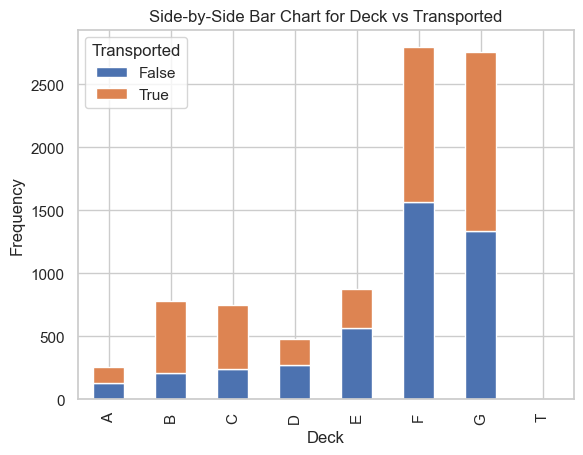

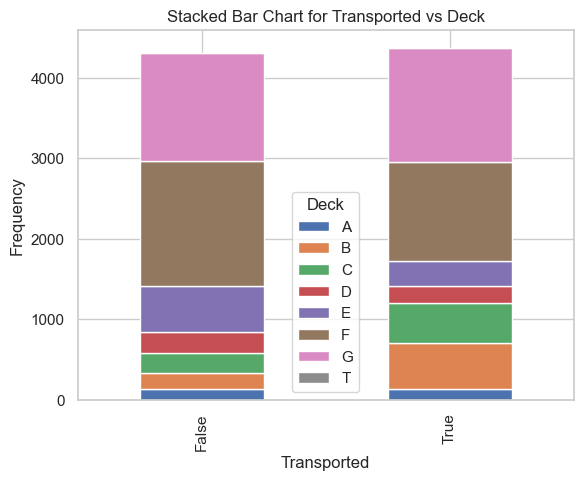

In [161]:
cat_cat_analysis(df, "Deck", "Transported")

Cramer's V: 0.4791033053016168
Observed Table:


Transported,False,True
Num,,
0,12,6
1,5,10
10,6,6
100,5,7
1000,3,3
...,...,...
995,1,2
996,0,1
997,2,0



Expected Table:


Transported,False,True
Num,,
0,8.934775,9.065225
1,7.445646,7.554354
10,5.956517,6.043483
100,5.956517,6.043483
1000,2.978258,3.021742
...,...,...
995,1.489129,1.510871
996,0.496376,0.503624
997,0.992753,1.007247



Residual Table:


Transported,False,True
Num,,
0,1.025464,-1.018059
1,-0.896277,0.889805
10,0.017817,-0.017688
100,-0.391919,0.389089
1000,0.012598,-0.012507
...,...,...
995,-0.400827,0.397933
996,-0.704540,0.699452
997,1.010917,-1.003617



Chi-Squared Statistic: 1995.3910213730715, p-value: 0.001896418609624204, Degree of freedom : 1816

Significance(Num and Transported): True


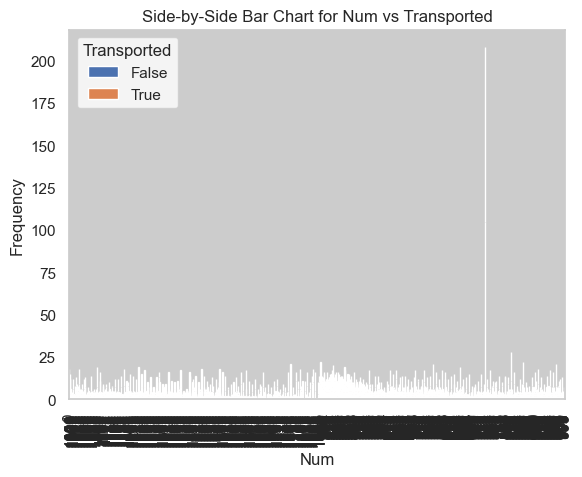

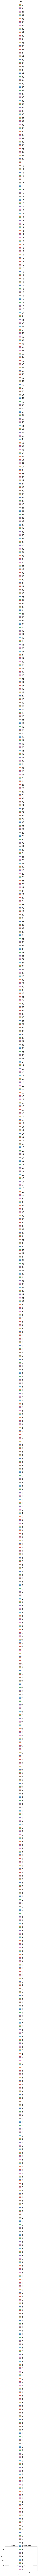

In [162]:
cat_cat_analysis(df, "Num", "Transported")

Cramer's V: 0.10116716927369994
Observed Table:


Transported,False,True
Side,,
P,2308,1898
S,2007,2480



Expected Table:


Transported,False,True
Side,,
P,2087.759117,2118.240883
S,2227.240883,2259.759117



Residual Table:


Transported,False,True
Side,,
P,4.820119,-4.785312
S,-4.666748,4.633049



Chi-Squared Statistic: 88.9710828350531, p-value: 4.0062612965840844e-21, Degree of freedom : 1

Significance(Side and Transported): True


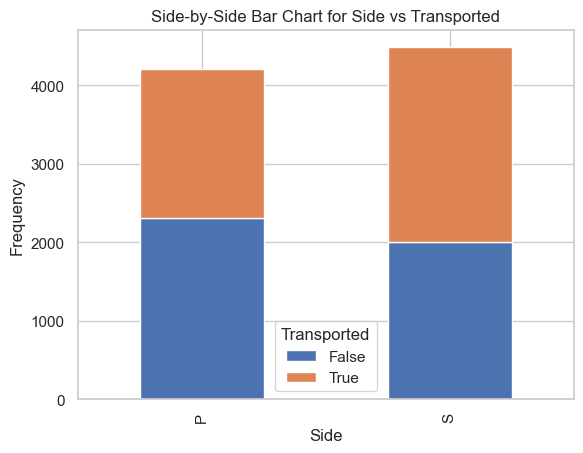

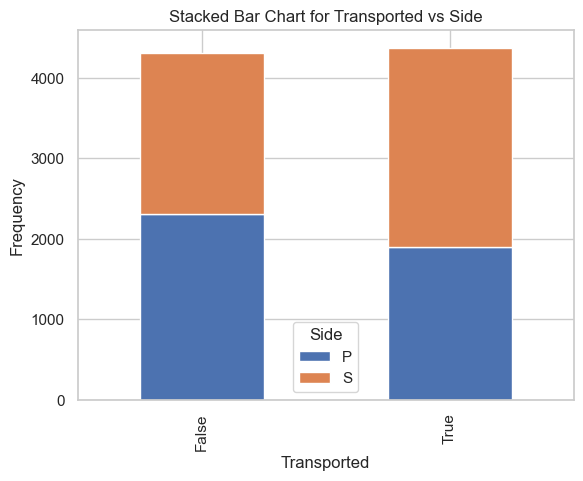

In [163]:
cat_cat_analysis(df, "Side", "Transported")

In [164]:
df_set = df[
    [
        "familySize",
        "HomePlanet",
        "CryoSleep",
        "Destination",
        "VIP",
        "Deck",
        "Num",
        "Side",
        "Transported",
    ]
]

In [165]:
df_set

,familySize,HomePlanet,CryoSleep,Destination,VIP,Deck,Num,Side,Transported
0,1,Europa,False,TRAPPIST-1e,False,B,0,P,False
1,1,Earth,False,TRAPPIST-1e,False,F,0,S,True
2,2,Europa,False,TRAPPIST-1e,True,A,0,S,False
3,2,Europa,False,TRAPPIST-1e,False,A,0,S,False
4,1,Earth,False,TRAPPIST-1e,False,F,1,S,True
...,...,...,...,...,...,...,...,...,...
8688,1,Europa,False,55 Cancri e,True,A,98,P,False
8689,1,Earth,True,PSO J318.5-22,False,G,1499,S,False
8690,1,Earth,False,TRAPPIST-1e,False,G,1500,S,True
8691,2,Europa,False,55 Cancri e,False,E,608,S,False


In [166]:
df_set = pd.get_dummies(
    df_set,
    columns=[
        "HomePlanet",
        "CryoSleep",
        "Destination",
        "VIP",
        "Deck",
        "Side",
        "Transported",
    ],
    prefix_sep="_",
    drop_first=True,
)

In [167]:
df_set

,familySize,Num,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,Transported_True
0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,98,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8689,1,1499,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
8690,1,1500,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
8691,2,608,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [168]:
df_set.isna().sum()

familySize                   0
Num                          0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_True                     0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_S                       0
Transported_True             0
dtype: int64

In [169]:
predictors = df_set.drop(columns=["Transported_True"], axis=1)
target = df_set["Transported_True"]

In [170]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    predictors, target, test_size=0.2, shuffle=True
)

In [171]:
train_X = np.ascontiguousarray(train_X.to_numpy())
test_X = np.ascontiguousarray(test_X.to_numpy())
train_y = np.ascontiguousarray(train_y.to_numpy())
test_y = np.ascontiguousarray(test_y.to_numpy())

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Classifier": SVC(random_state=42),
}

for name, model in models.items():
    model.fit(train_X, train_y)

    train_predictions = model.predict(train_X)
    print(name + " - Training set")
    print(classification_report(train_y, train_predictions))

    test_predictions = model.predict(test_X)
    print(name + " - Test set")
    print(classification_report(test_y, test_predictions))
    print("-----" * 10)

Decision Tree - Training set
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3454
           1       0.99      0.95      0.97      3500

    accuracy                           0.97      6954
   macro avg       0.97      0.97      0.97      6954
weighted avg       0.97      0.97      0.97      6954

Decision Tree - Test set
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       861
           1       0.66      0.67      0.67       878

    accuracy                           0.66      1739
   macro avg       0.66      0.66      0.66      1739
weighted avg       0.66      0.66      0.66      1739

--------------------------------------------------
Logistic Regression - Training set
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      3454
           1       0.77      0.63      0.69      3500

    accuracy                           0.7

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 1000, 2500, 5000],
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(train_X, train_y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
best_model = grid_search.best_estimator_